In [1]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6a81fe40de07c2859c65905509f3e6db


In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Retrieve data 
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Use enumerate() to reference the index and the city in the list 
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Handle API Request Errors with try-except Blocks; testing code 
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | winslow
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | dabola
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | sungaipenuh
Processing Record 9 of Set 1 | khormuj
City not found. Skipping...
Processing Record 10 of Set 1 | arlit
Processing Record 11 of Set 1 | lompoc
Processing Record 12 of Set 1 | porto novo
Processing Record 13 of Set 1 | singkang
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | husavik
Processing Record 17 of Set 1 | coolum beach
Processing Record 18 of Set 1 | bahia blanca
Processing Record 19 of Set 1 | isangel
Processing Record 20 of Set 1 | san cristobal
Processing Record 21 of Set 1 | kirakira
Processing Record 22 of Set 1 | port elizabet

Processing Record 38 of Set 4 | grand-santi
Processing Record 39 of Set 4 | narsaq
Processing Record 40 of Set 4 | ashcroft
Processing Record 41 of Set 4 | mehamn
Processing Record 42 of Set 4 | shulan
Processing Record 43 of Set 4 | lufilufi
Processing Record 44 of Set 4 | moose factory
Processing Record 45 of Set 4 | dolbeau
City not found. Skipping...
Processing Record 46 of Set 4 | dahanu
Processing Record 47 of Set 4 | zhuanghe
Processing Record 48 of Set 4 | bubaque
Processing Record 49 of Set 4 | castro
Processing Record 50 of Set 4 | seoul
Processing Record 1 of Set 5 | bethel
Processing Record 2 of Set 5 | pangnirtung
Processing Record 3 of Set 5 | erenhot
Processing Record 4 of Set 5 | walvis bay
Processing Record 5 of Set 5 | penukonda
Processing Record 6 of Set 5 | puerto penasco
Processing Record 7 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 8 of Set 5 | shellbrook
Processing Record 9 of Set 5 | hithadhoo
Processing Record 10 of Set 5 | tsihombe
Ci

Processing Record 26 of Set 8 | yulara
Processing Record 27 of Set 8 | murliganj
Processing Record 28 of Set 8 | makakilo city
Processing Record 29 of Set 8 | aragarcas
Processing Record 30 of Set 8 | faanui
Processing Record 31 of Set 8 | bonavista
Processing Record 32 of Set 8 | florida
Processing Record 33 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 34 of Set 8 | rungata
City not found. Skipping...
Processing Record 35 of Set 8 | tautira
Processing Record 36 of Set 8 | urumqi
Processing Record 37 of Set 8 | marzuq
Processing Record 38 of Set 8 | nouadhibou
Processing Record 39 of Set 8 | tadine
Processing Record 40 of Set 8 | cuanajo
Processing Record 41 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 42 of Set 8 | ketchikan
Processing Record 43 of Set 8 | chengmai
City not found. Skipping...
Processing Record 44 of Set 8 | neubrandenburg
Processing Record 45 of Set 8 | san javier
Processing Record 46 of Set 8 | iwaki
Processing Record 4

Processing Record 13 of Set 12 | paso de los toros
Processing Record 14 of Set 12 | seydi
Processing Record 15 of Set 12 | tonj
Processing Record 16 of Set 12 | la orilla
Processing Record 17 of Set 12 | ajdabiya
Processing Record 18 of Set 12 | lolua
City not found. Skipping...
Processing Record 19 of Set 12 | lewistown
Processing Record 20 of Set 12 | bam
Processing Record 21 of Set 12 | karamea
City not found. Skipping...
Processing Record 22 of Set 12 | adrar
Processing Record 23 of Set 12 | vardo
Processing Record 24 of Set 12 | kungurtug
Processing Record 25 of Set 12 | kotaparh
Processing Record 26 of Set 12 | det udom
Processing Record 27 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 28 of Set 12 | artyk
City not found. Skipping...
Processing Record 29 of Set 12 | temple
Processing Record 30 of Set 12 | alta
Processing Record 31 of Set 12 | povoa de varzim
Processing Record 32 of Set 12 | pravia
Processing Record 33 of Set 12 | ngukurr
City not found. Skipping...
Proc

In [7]:
# Loop through all the cities in our list and build city url
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
       # record_count = 1
        #time.sleep(60)

    # Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]

    # Gives error and requires another for loop to fetch city from cities list in order to function 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df2 = city_data_df[new_column_order]
city_data_df2.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Winslow,US,2022-01-30 01:51:03,35.0242,-110.6974,44.78,25,0,0.00
1,Atuona,PF,2022-01-30 01:51:04,-9.8000,-139.0333,78.03,78,24,13.35
2,Khatanga,RU,2022-01-30 01:51:04,71.9667,102.5000,-8.77,97,94,7.92
3,Port Alfred,ZA,2022-01-30 01:51:04,-33.5906,26.8910,68.13,87,14,7.63
4,Punta Arenas,CL,2022-01-30 01:48:24,-53.1500,-70.9167,50.11,57,0,16.11
5,Dabola,GN,2022-01-30 01:51:05,10.7500,-11.1167,72.81,24,24,1.74
6,Butaritari,KI,2022-01-30 01:51:05,3.0707,172.7902,82.54,72,67,17.94
7,Sungaipenuh,ID,2022-01-30 01:51:06,-2.0833,101.3833,71.89,84,100,1.23
8,Arlit,NE,2022-01-30 01:51:06,18.7369,7.3853,60.60,17,3,7.25
9,Lompoc,US,2022-01-30 01:48:08,34.6391,-120.4579,61.79,58,0,5.75


In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

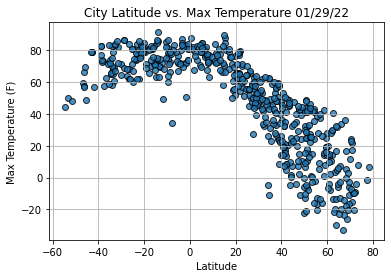

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../Weather_Data/Fig1.png")

# Show plot.
plt.show()

In [14]:
# Create the output file (CSV).
output_data_file = "../Weather_Data/cities.csv"
# Export the City_Data into a CSV.
city_data_df2.to_csv(output_data_file, index_label="City_ID")